## Predicting the number of cigarettes smoked per week from a measure of risk taking in a social context (Domain-Specific Risk-Taking (DOSPERT) Scale )
**This is private data. Please do not share**

* Date: 2017 - 12 - 22

* Version: 1
* Editors: Fionn Delahunty 

------- 

This notebook (R code) investigates if the Domain-Specific Risk-Taking (DOSPERT) Scale social context  measure is a predictor of the number of cigarettes smoked in a week in the sample data. 



__Summary of steps__

_ Exploratory data analysis _ 
1. Dataset import 
2. Testing distribution of risk taking measure
3. Testing distribution of number of cigarettes smoked measure 

_ Model building _ 

4. Investigating the two variables together 
5. Investigating modeling using logistic regression
5. Investigating modeling using additive regression 
6. Investigating modeling using regression trees 


------
__ Conclusion __
Overall, there is very little difference in social risk taking between groups of smokers. This difference does not lend itself to an easy prediction, and realistically is probably not worth predicting. Fundamentally there is no statically significant difference between smoking groups based on social risk taking 


### 1. Dataset Import

In [7]:
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")
#names(data)

### 2. Testing distribution of risk taking measure

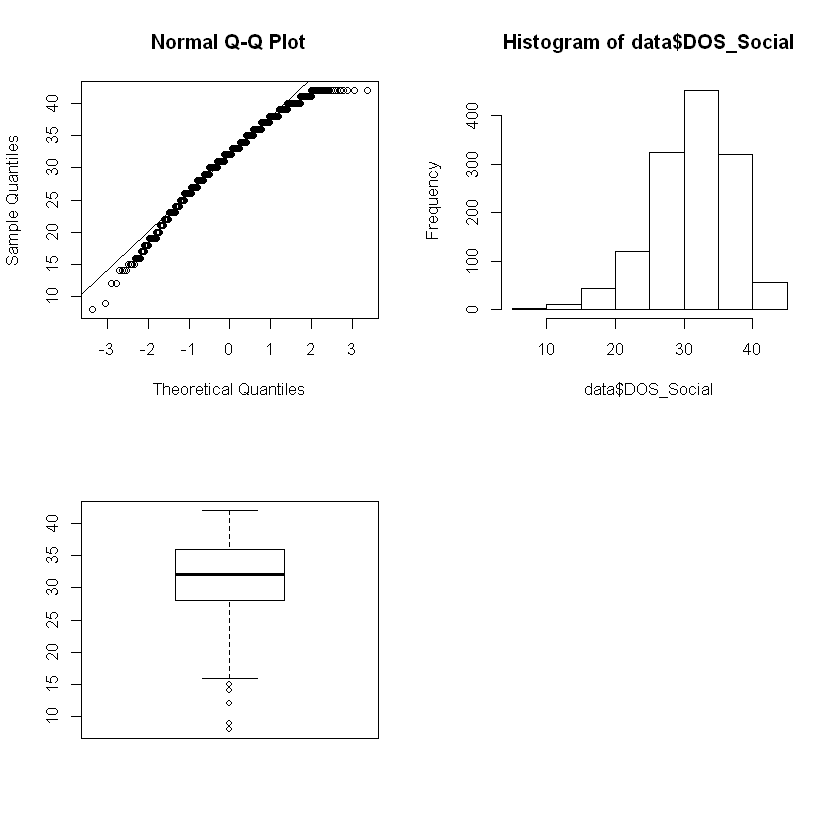

In [8]:
#library(psych)
#describe(data$DOS_Social)
par(mfrow = c(2,2))

qqnorm((data$DOS_Social))
qqline((data$DOS_Social))


hist(data$DOS_Social)
boxplot(data$DOS_Social)

__ Notes __
* Not so sure about the distribution, there seem to be a tail at the upper limit and some small outiers to the lower right handside. 
* Some outlining  values to lower ends of the boxplot as well. However, given the size of the dataset we might be ok

### 3. Testing the distribution of Cigarettes smoked per week 

In [14]:
library(psych)

#Changing all null values to 0
data$HOW_MANY_CIGARETTES_PER_WEEK[is.na(data$HOW_MANY_CIGARETTES_PER_WEEK)] <- 0


table(data$HOW_MANY_CIGARETTES_PER_WEEK)
par(mfrow = c(2,2))

qqnorm(data$HOW_MANY_CIGARETTES_PER_WEEK)
qqline(data$HOW_MANY_CIGARETTES_PER_WEEK)

hist(data$HOW_MANY_CIGARETTES_PER_WEEK)
boxplot(data$HOW_MANY_CIGARETTES_PER_WEEK)

ERROR: Error: package or namespace load failed for 'psych' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'


__ Notes: __ 
* Our distribution of CSPW is unuseable in it's current state. The spread of the data is a problem, below we slipt the varible into 7 levels by breaks of 25. We do this twice, one to inc the 1024 zero values and one which one inc + 1 values 

cigarette
   (0,25]   (25,50]   (50,75]  (75,100] (100,125] (125,150] (150,175] 
      113        47        44         8        19        24         6 

cigarette_zero_inc
  (-1,24]   (24,49]   (49,74]   (74,99]  (99,124] (124,149] (149,174] 
      110        45        49         5        22        24         0 

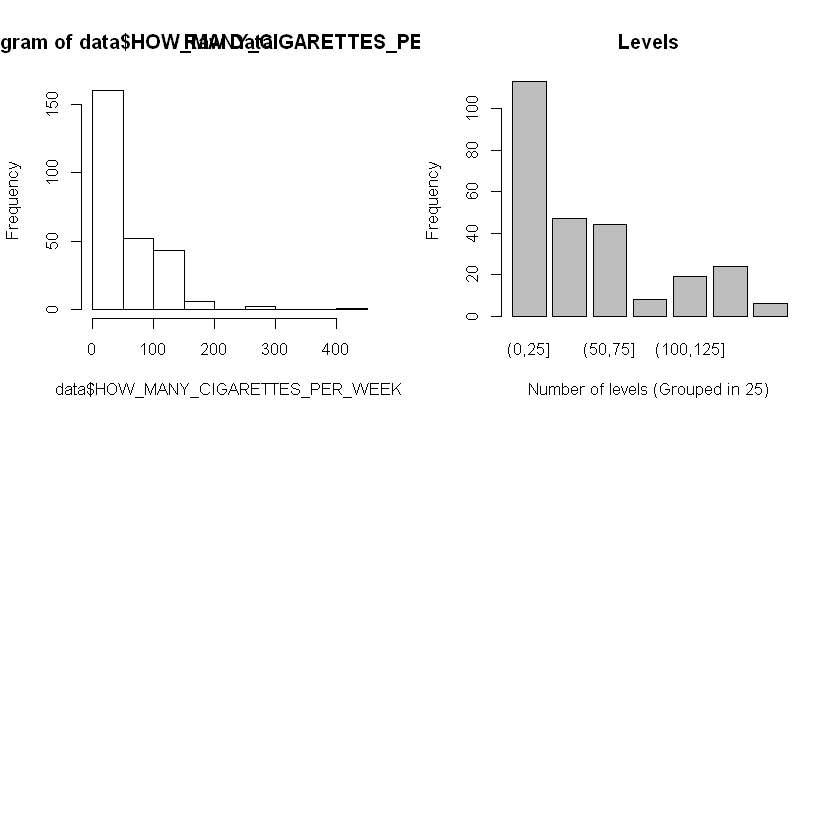

In [15]:
cigarette <- cut(data$HOW_MANY_CIGARETTES_PER_WEEK, breaks = seq(0, 175, by = 25))
cigarette_zero_inc <- cut(data$HOW_MANY_CIGARETTES_PER_WEEK, breaks = seq(-1, 175, by = 25))


table(cigarette)
table(cigarette_zero_inc)

par(mfrow = c(2,2))

hist(data$HOW_MANY_CIGARETTES_PER_WEEK)
title("Raw Data")
plot(cigarette)
title(main="Levels", xlab="Number of levels (Grouped in 25)", ylab="Frequency")

## 4. Investigating the two variables together 
1. We start with a simple anova comparing the seven levels. 
2. We recode the levels as dummy varibles and perform a linear regression

[1] "Anova"


                      Df Sum Sq Mean Sq F value Pr(>F)
as.factor(cigarette)   6    141   23.57   0.793  0.576
Residuals            254   7549   29.72               
1067 observations deleted due to missingness

[1] " ----------------------------------------------------------------------------------------------------- "



	Kruskal-Wallis rank sum test

data:  data$DOS_Social and as.factor(cigarette)
Kruskal-Wallis chi-squared = 5.4839, df = 6, p-value = 0.4834


[1] " ----------------------------------------------------------------------------------------------------- "


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$DOS_Social ~ as.factor(cigarette))

$`as.factor(cigarette)`
                           diff        lwr       upr     p adj
(25,50]-(0,25]      -0.15044248  -2.962728  2.661843 0.9999986
(50,75]-(0,25]      -0.01407884  -2.893279  2.865121 1.0000000
(75,100]-(0,25]      1.84955752  -4.078276  7.777391 0.9678825
(100,125]-(0,25]    -2.25570564  -6.273229  1.761818 0.6375184
(125,150]-(0,25]     0.39122419  -3.250466  4.032914 0.9999134
(150,175]-(0,25]     1.51622419  -5.271843  8.304292 0.9943778
(50,75]-(25,50]      0.13636364  -3.262494  3.535221 0.9999998
(75,100]-(25,50]     2.00000000  -4.196906  8.196906 0.9620889
(100,125]-(25,50]   -2.10526316  -6.510140  2.299614 0.7903776
(125,150]-(25,50]    0.54166667  -3.523348  4.606682 0.9996958
(150,175]-(25,50]    1.66666667  -5.357599  8.690932 0.9922075
(75,100]-(50,75]     1.86363636  -4.363923  8.091195 0.9739105
(100,125]-(50,75]   -

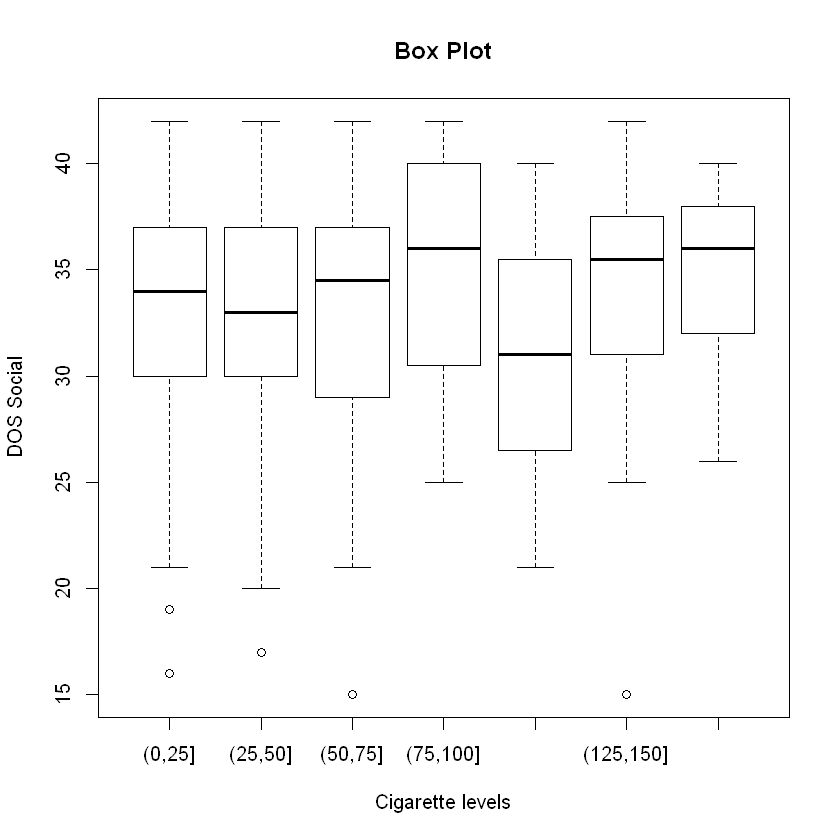

In [16]:
boxplot(data$DOS_Social~cigarette)
title(main="Box Plot",  
  	xlab="Cigarette levels", ylab="DOS Social")
anovatest<-aov(data$DOS_Social~as.factor(cigarette),)
library(xtable)
print ("Anova")
summary(anovatest)
print(" ----------------------------------------------------------------------------------------------------- ")
kruskal.test(data$DOS_Social,as.factor(cigarette))
print(" ----------------------------------------------------------------------------------------------------- ")
TukeyHSD(anovatest)

__ Notes: __
* ANOVA: Did not reject the null hypothesis, sample size might have been an issue
* KW: Same as above, but sample size can't really be an issue here
* Boxplot: Yes there is a difference in means, but __ A: __ it's not very big and __ B: __ it's not in one direction (Increasing or decreasing) 
* We also see quite a large spread in the box plot for each grouping 

## 5. Model building (Regression) 


Call:
lm(formula = data$DOS_Social ~ second + third + forth + fifth + 
    seven, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6271  -3.6271   0.3729   4.3729  10.3729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.6271     0.1664 190.024   <2e-16 ***
second        1.3729     0.8587   1.599   0.1101    
third         1.5093     0.8864   1.703   0.0889 .  
forth         3.3729     2.0486   1.646   0.0999 .  
fifth        -0.7323     1.3353  -0.548   0.5835    
seven         3.0396     2.3636   1.286   0.1987    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.775 on 1322 degrees of freedom
Multiple R-squared:  0.007331,	Adjusted R-squared:  0.003577 
F-statistic: 1.953 on 5 and 1322 DF,  p-value: 0.08299


ERROR: Error in eval(expr, envir, enclos): object 'id' not found


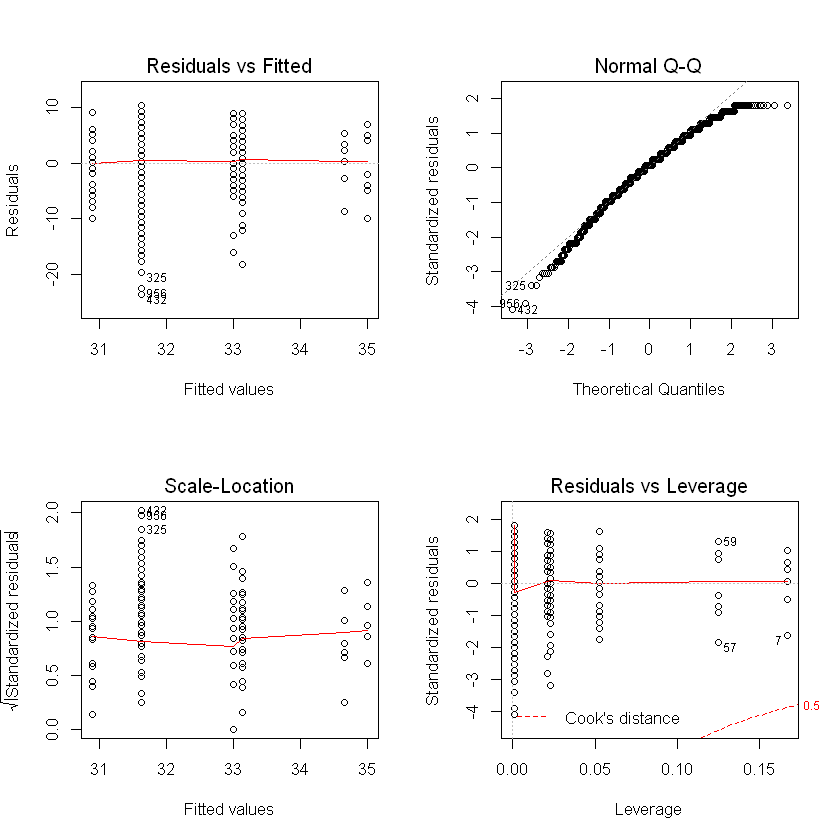

In [17]:
#Create N 
n<-dim(data)[1]
#Create new var
first<-rep(0,n);
second<-rep(0,n);
third<-rep(0,n)
forth<-rep(0,n)
fifth<-rep(0,n)
sixth<-rep(0,n)
seven<-rep(0,n)
#Assign var 1/0 based on grouping 
first[cigarette=='(0,25]']<-1;
second[cigarette=='(25,50]']<-1;
third[cigarette=='(50,75]']<-1;
forth[cigarette=='(75,100]']<-1;
fifth[cigarette=='(100,125]']<-1;
sixth[cigarette=='(125,150]']<-1;
seven[cigarette=='(150,175]']<-1;

#Create new dataframe with names
data2<-cbind(first,second,third,forth,fifth,sixth,seven)
names(data2)<-c("first","second","third","forth","fifth","sixth","seven",names(data))
data2 <-data.frame(data2)

#Perform LM
#First dropped to act as baseline 
regmod<-lm(data$DOS_Social~second+third+forth+fifth+seven,data=data2)
summary(regmod)
mm <- regmod
par(mfrow=c(2,2))
plot(mm)
p<-locator()

cooksd<-cooks.distance(mm)


plot(cooksd,main="Cooks Distance",type="h")
abline(h=qf(.95,1,mm$df),lty=2)
if (max(id$ind)!=-Inf) {text(id$ind,cooksd[id$ind],id$ind,pos=id$pos) }
plot(mm$hat,main="Leverage")
abline(h=3*length(mm$coef)/dim(SA)[1])
if (max(idlev$ind)!=-Inf) {text(idlev$ind,lm1$hat[idlev$ind],idlev$ind,pos=idlev$pos)}

In [21]:
# BIC Regression
step(mm,directions="backward")
ss<-step(mm,trace=0,k=500)
print(ss$anova)

RSSvec<-ss$anova[,5]
deltaRSSvec<-diff(RSSvec)
MSEvec<-RSSvec[2:length(RSSvec)]/ss$anova[2:length(RSSvec),4]
Fvec<-deltaRSSvec/MSEvec
pvals<-1-pf(Fvec,1,ss$anova[2:length(RSSvec),4])
out<-cbind(ss$anova[2:length(RSSvec),1],round(Fvec,3),round(pvals,5))
colnames(out)<-c("variable drop","F","p-value")
print(out)

Start:  AIC=6433.11
data$DOS_Social ~ data$DOS_Recreational + second + third + forth + 
    fifth + sixth + seven - 1

                        Df Sum of Sq     RSS    AIC
- fifth                  1        74  166965 6431.7
- seven                  1       161  167052 6432.4
<none>                                166890 6433.1
- second                 1       261  167152 6433.2
- sixth                  1       328  167218 6433.7
- forth                  1       637  167528 6436.2
- third                  1       792  167683 6437.4
- data$DOS_Recreational  1   1054528 1221418 9074.4

Step:  AIC=6431.7
data$DOS_Social ~ data$DOS_Recreational + second + third + forth + 
    sixth + seven - 1

                        Df Sum of Sq     RSS    AIC
- seven                  1       159  167124 6431.0
<none>                                166965 6431.7
- second                 1       255  167219 6431.7
- sixth                  1       322  167287 6432.3
- forth                  1       633  16759


Call:
lm(formula = data$DOS_Social ~ data$DOS_Recreational + third + 
    forth + sixth - 1, data = data2)

Coefficients:
data$DOS_Recreational                  third                  forth  
                1.177                  4.175                  8.820  
                sixth  
                3.586  


      Step Df  Deviance Resid. Df Resid. Dev      AIC
1          NA        NA      1321   166890.4 9919.105
2  - fifth  1  74.23419      1322   166964.7 9419.696
3  - seven  1 159.49489      1323   167124.2 8920.964
4 - second  1 249.21020      1324   167373.4 8422.943
5  - sixth  1 302.89338      1325   167676.3 7925.344
6  - forth  1 611.13752      1326   168287.4 7430.175
7  - third  1 704.29196      1327   168991.7 6935.721
     variable drop F       p-value  
[1,] "- fifth"     "0.588" "0.44342"
[2,] "- seven"     "1.263" "0.26136"
[3,] "- second"    "1.971" "0.16054"
[4,] "- sixth"     "2.394" "0.12208"
[5,] "- forth"     "4.815" "0.02838"
[6,] "- third"     "5.53"  "0.01883"


__ Notes: __ 
* Regression model suggests that none of the 6 levels have an interaction effect with DOS_Social when the first level is taken as a baseline. 

## 4. Additive model  
* Here we try an additive model to investigate the interaction of DOS Social & DOS Recreational while holding for smoking 


[1] 0.3475147

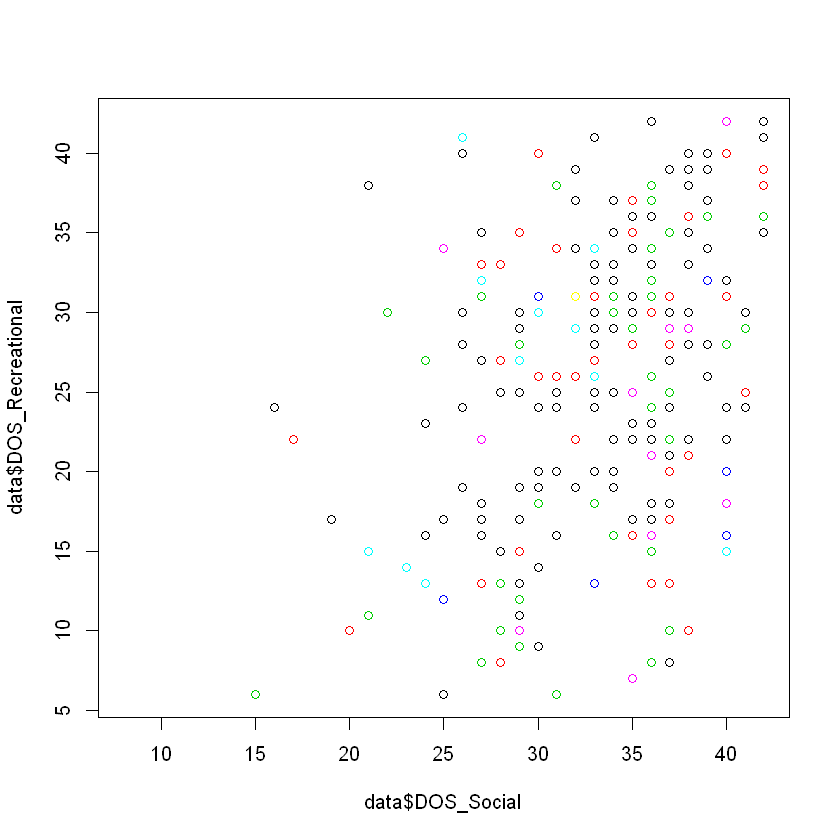

In [22]:
cor(data$DOS_Social,data$DOS_Recreational)
plot(data$DOS_Social,data$DOS_Recreational,col=cigarette)



Call:
lm(formula = data$DOS_Social ~ data$DOS_Recreational + third + 
    forth - 1, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.992  -4.916   3.594  11.697  34.924 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
data$DOS_Recreational  1.17928    0.01233  95.629   <2e-16 ***
third                  4.11001    1.72285   2.386   0.0172 *  
forth                  8.76104    3.98670   2.198   0.0282 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.25 on 1325 degrees of freedom
Multiple R-squared:  0.8788,	Adjusted R-squared:  0.8785 
F-statistic:  3201 on 3 and 1325 DF,  p-value: < 2.2e-16


ERROR: Error in eval(expr, envir, enclos): object 'id' not found


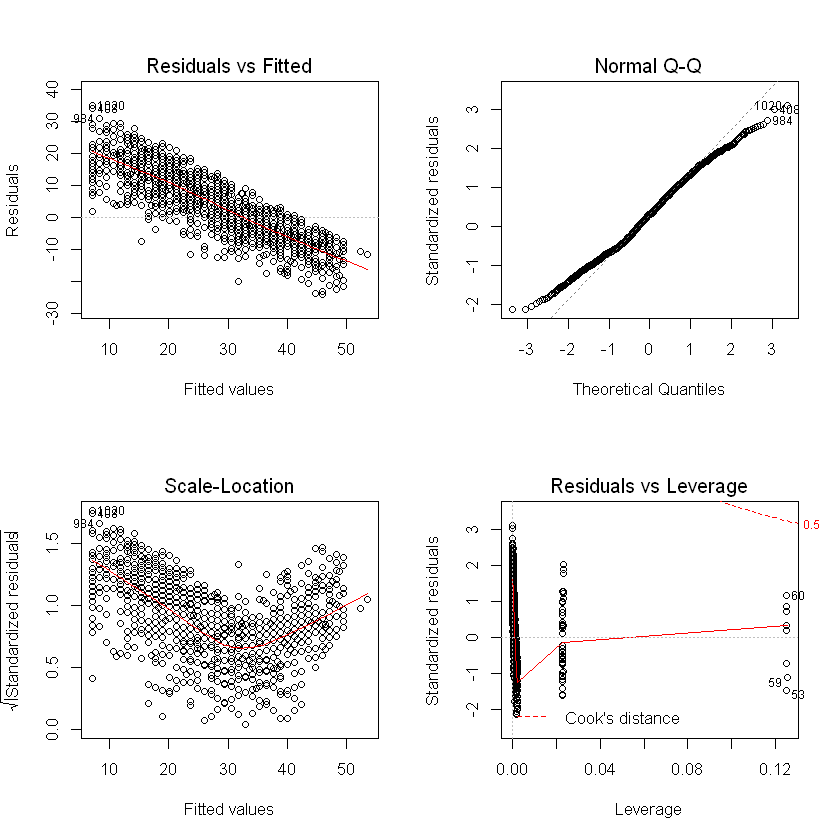

In [25]:
regmod<-lm(data$DOS_Social~data$DOS_Recreational+third+forth-1,data=data2)
summary(regmod)
mm <- regmod
par(mfrow=c(2,2))
plot(mm)
p<-locator()

cooksd<-cooks.distance(mm)


plot(cooksd,main="Cooks Distance",type="h")
abline(h=qf(.95,1,mm$df),lty=2)
if (max(id$ind)!=-Inf) {text(id$ind,cooksd[id$ind],id$ind,pos=id$pos) }
plot(mm$hat,main="Leverage")
abline(h=3*length(mm$coef)/dim(SA)[1])
if (max(idlev$ind)!=-Inf) {text(idlev$ind,lm1$hat[idlev$ind],idlev$ind,pos=idlev$pos)}

In [24]:
step(mm,directions="backward")
ss<-step(mm,trace=0,k=500)
print(ss$anova)

RSSvec<-ss$anova[,5]
deltaRSSvec<-diff(RSSvec)
MSEvec<-RSSvec[2:length(RSSvec)]/ss$anova[2:length(RSSvec),4]
Fvec<-deltaRSSvec/MSEvec
pvals<-1-pf(Fvec,1,ss$anova[2:length(RSSvec),4])
out<-cbind(ss$anova[2:length(RSSvec),1],round(Fvec,3),round(pvals,5))
colnames(out)<-c("variable drop","F","p-value")
print(out)

Start:  AIC=6433.11
data$DOS_Social ~ data$DOS_Recreational + second + third + forth + 
    fifth + sixth + seven - 1

                        Df Sum of Sq     RSS    AIC
- fifth                  1        74  166965 6431.7
- seven                  1       161  167052 6432.4
<none>                                166890 6433.1
- second                 1       261  167152 6433.2
- sixth                  1       328  167218 6433.7
- forth                  1       637  167528 6436.2
- third                  1       792  167683 6437.4
- data$DOS_Recreational  1   1054528 1221418 9074.4

Step:  AIC=6431.7
data$DOS_Social ~ data$DOS_Recreational + second + third + forth + 
    sixth + seven - 1

                        Df Sum of Sq     RSS    AIC
- seven                  1       159  167124 6431.0
<none>                                166965 6431.7
- second                 1       255  167219 6431.7
- sixth                  1       322  167287 6432.3
- forth                  1       633  16759


Call:
lm(formula = data$DOS_Social ~ data$DOS_Recreational + third + 
    forth + sixth - 1, data = data2)

Coefficients:
data$DOS_Recreational                  third                  forth  
                1.177                  4.175                  8.820  
                sixth  
                3.586  


      Step Df  Deviance Resid. Df Resid. Dev      AIC
1          NA        NA      1321   166890.4 9919.105
2  - fifth  1  74.23419      1322   166964.7 9419.696
3  - seven  1 159.49489      1323   167124.2 8920.964
4 - second  1 249.21020      1324   167373.4 8422.943
5  - sixth  1 302.89338      1325   167676.3 7925.344
6  - forth  1 611.13752      1326   168287.4 7430.175
7  - third  1 704.29196      1327   168991.7 6935.721
     variable drop F       p-value  
[1,] "- fifth"     "0.588" "0.44342"
[2,] "- seven"     "1.263" "0.26136"
[3,] "- second"    "1.971" "0.16054"
[4,] "- sixth"     "2.394" "0.12208"
[5,] "- forth"     "4.815" "0.02838"
[6,] "- third"     "5.53"  "0.01883"


__ Notes: __
* DOS_Re improves our model fit, 